<a href="https://colab.research.google.com/github/emiliomercuri/hidrologia/blob/main/notebooks/__2023_Exemplo_3_(aula)_Hidrograma_Unit%C3%A1rio_(aplica%C3%A7%C3%A3o_do_HU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aplicação do Hidrograma Unitário

### Encontre o escoamento direto usando o HU calculado

Finding the direct runoff hydrograph from given Unit Hydrograph and precipitation


$$
Q_{n}=\sum_{m=1}^{n \leq M} P_{m} U_{n-m+1}
$$

### Dados:


| Tempo (0.5 h) | Precipitação Efetiva (mm) |
| :---: | :---: |
| 1 | 2 |
| 2 | 3 |
| 3 | 1 |



In [ ]:
# Unit hydrograph derivation by matrix calculations
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# Usaremos a Função:
#np.linalg.solve?

# Que faz uma regressão linear usando o método dos mínimos quadrados

In [ ]:
# Bibliotecas
import numpy as np

In [ ]:
UH = np.array([ 403.85691971, 1078.90444553, 2343.01285101, 2505.91399715,
       1460.10115124,  453.08365463,  380.95686321,  274.18716607,
        172.91879362])

In [ ]:
# UH foi obtido no exemplo anterior
precipitation = np.array([2,3,1]) # Precipitação
M = len(precipitation)
K = len(UH)
N=K+M-1
P = np.zeros((N,K))

for j in range(0,K):
  for i in range(0,K):
    for l in range(0,M):
      row = j + l
      P[row,j] = precipitation[l]

Q = np.dot(P,UH) # Produto escalar entre dois vetores
print(Q)


[  807.71383942  3369.37965019  8326.59595832 13119.77099286
 12780.95714494  7792.38476013  3581.26584155  2144.3285764
  1549.35594866   792.94354693   172.91879362]


In [ ]:
Baseflow = 500
Streamflow = Q + Baseflow
Streamflow

array([ 1307.71383942,  3869.37965019,  8826.59595832, 13619.77099286,
       13280.95714494,  8292.38476013,  4081.26584155,  2644.3285764 ,
        2049.35594866,  1292.94354693,   672.91879362])

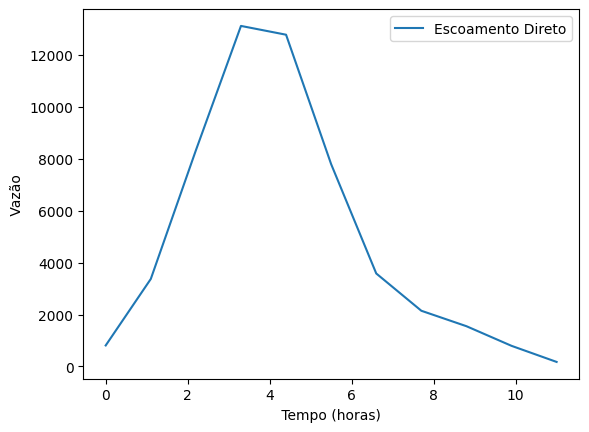

In [ ]:
time = np.linspace(0,N,N)
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
#plt.plot(time, Streamflow, label='Streamflow')
plt.plot(time, Q, label='Escoamento Direto')
leg = ax.legend()
ax.set_xlabel(' Tempo (horas) ')
ax.set_ylabel (' Vazão ')
plt.show()

In [ ]:
index_prec = np.arange(len(precipitation))

<Figure size 1500x800 with 0 Axes>

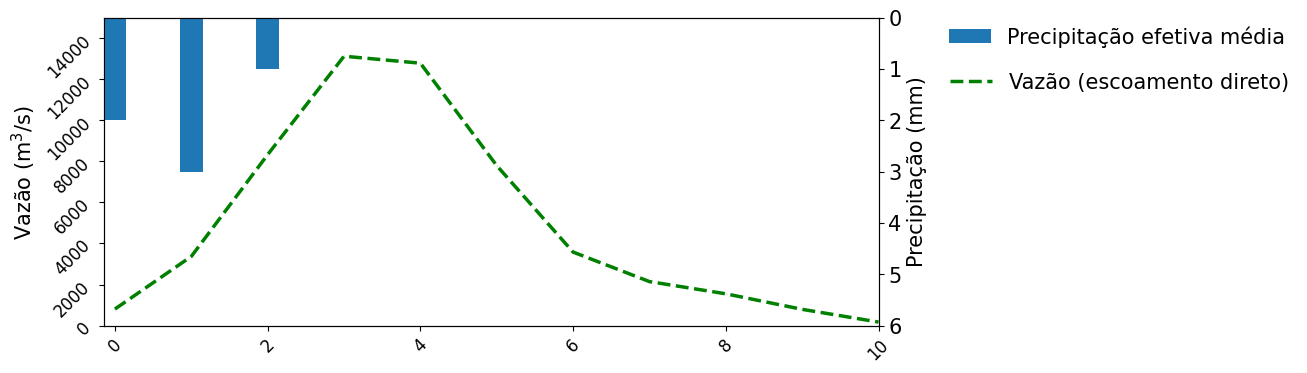

In [ ]:
plt.figure(figsize=(15,8))
plt.gcf().autofmt_xdate()

fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(Q,color='green', marker='o', linestyle='dashed',linewidth=2.5, markersize=0.1, label = 'Vazão (escoamento direto)')
ax1.set_ylim(0,15000)
ax1.margins(0.0)
ax1.tick_params(axis='both', labelsize=12,rotation=45) #increase font size for ticks
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=15) #y label

ax1.legend(bbox_to_anchor=(1.54, 0.85), borderaxespad=0.,frameon=False, fontsize=15)

ax2 = ax1.twinx()
ax2.margins(0.0)
ax2.bar(index_prec,precipitation, width=0.3, label = 'Precipitação efetiva média')

ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylabel('Precipitação (mm)', fontsize=15) #y label
ax2.set_ylim(6,0)
ax2.legend(loc=0)

leg = plt.legend();

plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.,frameon=False, fontsize=15)
plt.savefig('vazao_versus_prec_selecao(ex3).png', dpi = 300, bbox_inches='tight')
plt.show();